In [ ]:
# This script imports the FCS files from a flow cytometer and quantify the number of reference and test strain abundance 
# in a population based on different fluorophores 

# NOTE
# The code is made available for transparency reasons. At present, it is not intended to be readily usable on different datasets. 
# Also, it was not annotated and compiled to be user-friendly. Please, contact me privately for any inquiry related to the code usage.
# I will maintain this code with improved versions as soon as they are developed.

In [1]:
import FlowCytometryTools
from FlowCytometryTools import FCMeasurement
from FlowCytometryTools import ThresholdGate, PolyGate
from pylab import *
from itertools import chain
import matplotlib.pylab as pylab
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
params = {'legend.fontsize': 'x-large',
#           'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
import pandas as pd 
from FlowCytometryTools import PolyGate
%matplotlib inline

C:\Anaconda2\envs\py36\lib\site-packages\FlowCytometryTools\core\docstring.py:56: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  doc = dedent(doc)
C:\Anaconda2\envs\py36\lib\site-packages\FlowCytometryTools\core\docstring.py:56: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  doc = dedent(doc)


In [2]:
import glob
from FlowCytometryTools import FCMeasurement

In [3]:
files=glob.glob("*.fcs")
datacounts = pd.DataFrame(columns = ['Name', 'Counts', 'Ref']) 

In [4]:
files

['Specimen_001_A10_A10.fcs',
 'Specimen_001_A1_A01.fcs',
 'Specimen_001_A2_A02.fcs',
 'Specimen_001_A3_A03.fcs',
 'Specimen_001_A4_A04.fcs',
 'Specimen_001_A5_A05.fcs',
 'Specimen_001_A6_A06.fcs',
 'Specimen_001_A7_A07.fcs',
 'Specimen_001_A8_A08.fcs',
 'Specimen_001_A9_A09.fcs',
 'Specimen_001_B10_B10.fcs',
 'Specimen_001_B1_B01.fcs',
 'Specimen_001_B2_B02.fcs',
 'Specimen_001_B3_B03.fcs',
 'Specimen_001_B4_B04.fcs',
 'Specimen_001_B5_B05.fcs',
 'Specimen_001_B6_B06.fcs',
 'Specimen_001_B7_B07.fcs',
 'Specimen_001_B8_B08.fcs',
 'Specimen_001_B9_B09.fcs',
 'Specimen_001_C10_C10.fcs',
 'Specimen_001_C1_C01.fcs',
 'Specimen_001_C2_C02.fcs',
 'Specimen_001_C3_C03.fcs',
 'Specimen_001_C4_C04.fcs',
 'Specimen_001_C5_C05.fcs',
 'Specimen_001_C6_C06.fcs',
 'Specimen_001_C7_C07.fcs',
 'Specimen_001_C8_C08.fcs',
 'Specimen_001_C9_C09.fcs',
 'Specimen_001_D10_D10.fcs',
 'Specimen_001_D1_D01.fcs',
 'Specimen_001_D2_D02.fcs',
 'Specimen_001_D3_D03.fcs',
 'Specimen_001_D4_D04.fcs',
 'Specimen_001_D

In [5]:
# set a sample to find the limits for gating
sample = FCMeasurement(ID='Test Sample', datafile=r'Specimen_001_A10_A10.fcs')
print(sample.channel_names)

('FSC-A', 'SSC-A', 'APC-A', 'APC-Cy7-A', 'FITC-A', 'PerCP-A', 'mCFP-A', 'Chromomycin A3-A', 'PE-A', 'PE-Texas Red-A', 'PE-Cy5-A', 'PE-Cy7-A', 'Time')


C:\Anaconda2\envs\py36\lib\site-packages\matplotlib\colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


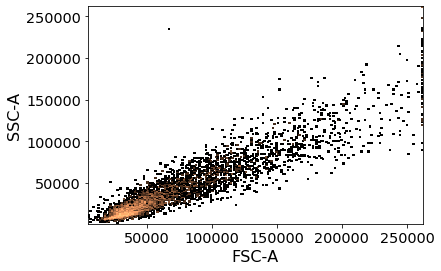

In [6]:
# look at FSC-A and SSC-A for gating cells
#tsample = sample.transform('hlog', channels=['FSC-A', 'SSC-A'], b=500.0)
sample.plot(['FSC-A', 'SSC-A']);

In [ ]:
# select the gate
sample.view_interactively(backend='wx')

In [7]:
# copy the gate coordinates and create a gate call 'cells'
cells = PolyGate([(1.911e+04, 2.334e+05), (1.073e+04, 3.525e+04), (9.585e+03, 3.969e+03), (2.140e+04, 1.702e+03), (2.603e+05, 2.609e+03),
                  (2.584e+05, 2.597e+05), (2.140e+04, 2.551e+05), (1.873e+04, 2.343e+05)], ('FSC-A', 'SSC-A'), name='cells')

C:\Anaconda2\envs\py36\lib\site-packages\matplotlib\colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


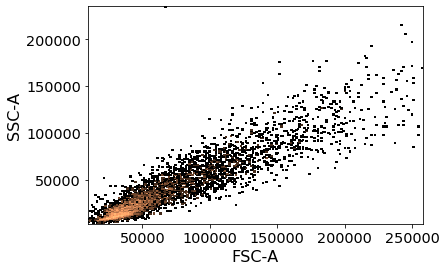

In [8]:
# gate the sample and visualize it
gated_sample = sample.gate(cells)
gated_sample.plot(['FSC-A', 'SSC-A']);

C:\Anaconda2\envs\py36\lib\site-packages\matplotlib\colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


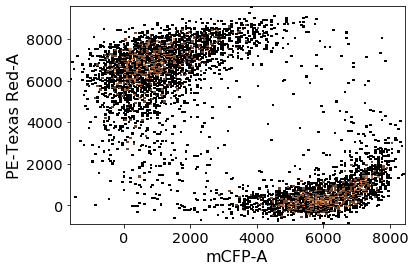

In [9]:
#transform mCFP and texas red in log
tsample = gated_sample.transform('hlog', channels=['PE-Texas Red-A', 'mCFP-A'], b=500.0)
tsample.plot(['mCFP-A', 'PE-Texas Red-A']);

In [ ]:
# select the gate
tsample.view_interactively(backend='wx')

In [10]:
ref =  PolyGate([(9.452e+03, 8.382e+03), (6.672e+03, 6.443e+03), (4.056e+03, 4.504e+03), (2.512e+03, 3.191e+03), (1.513e+03, 2.385e+03), 
                 (-8.121e+02, 5.655e+02), (-8.303e+02, 2.550e+03), (-8.303e+02, 8.382e+03), (9.452e+03, 8.382e+03)], 
                ('PE-Texas Red-A', 'mCFP-A'),  region='in', name='ref')
test = PolyGate([(9.488e+03, 8.293e+03), (5.691e+03, 4.877e+03), (1.931e+03, 2.684e+03), (-8.485e+02, 9.832e+02), 
                 (-8.303e+02, -1.568e+03), (9.470e+03, -1.553e+03), (9.488e+03, 8.278e+03)], ('PE-Texas Red-A', 'mCFP-A'), 
                region='in', name='test')

C:\Anaconda2\envs\py36\lib\site-packages\matplotlib\colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


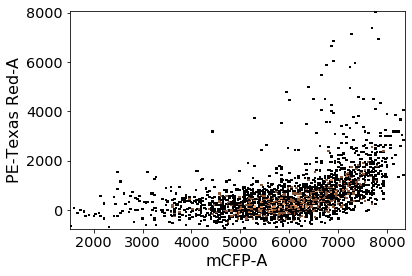

In [11]:
# gate the sample and visualize it
ref_trial = tsample.gate(ref)
ref_trial.plot(['mCFP-A', 'PE-Texas Red-A']);

C:\Anaconda2\envs\py36\lib\site-packages\matplotlib\colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


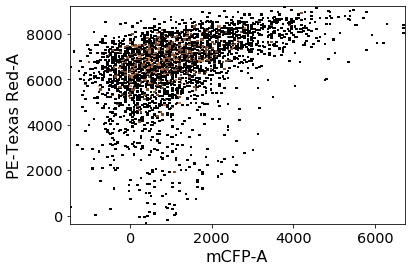

In [12]:
# gate the sample and visualize it
str_trial = tsample.gate(test)
str_trial.plot(['mCFP-A', 'PE-Texas Red-A']);

In [13]:
# Do the analysis for all the samples
for i in range(0,len(files)):
    sample = FCMeasurement(ID='Sample', datafile=files[i])
    gated_sample = sample.gate(cells)
    tsample = gated_sample.transform('hlog', channels=['PE-Texas Red-A', 'mCFP-A','FSC-A', 'SSC-A'], b=500.0)
    reference = tsample.gate(ref)
    strain = tsample.gate(test)
    nref=reference.get_data().shape[0]
    nstr=strain.get_data().shape[0]
    ntot = nref + nstr
    temp = pd.DataFrame([[files[i], ntot, nstr, nref]], columns = ['Name', 'Counts', 'test', 'Ref']) 
    datacounts = datacounts.append(temp, sort = False)

In [14]:
# Save the results in output
datacounts.to_csv("output.csv", index=False)

In [15]:
datacounts

,Name,Counts,Ref,test
0,Specimen_001_A10_A10.fcs,5483,2344,3139.0
0,Specimen_001_A1_A01.fcs,4065,1579,2486.0
0,Specimen_001_A2_A02.fcs,5469,1078,4391.0
0,Specimen_001_A3_A03.fcs,4124,1568,2556.0
0,Specimen_001_A4_A04.fcs,8281,1285,6996.0
0,Specimen_001_A5_A05.fcs,4207,1774,2433.0
0,Specimen_001_A6_A06.fcs,7048,1152,5896.0
0,Specimen_001_A7_A07.fcs,6725,1103,5622.0
0,Specimen_001_A8_A08.fcs,6816,1069,5747.0
0,Specimen_001_A9_A09.fcs,3246,1746,1500.0
